In [1]:
# Download all packages 
import pickle
import detritalpy.detritalFuncs as dFunc
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from random import choices
from random import randrange
from random import randint
import random
import time

In [2]:
# Lets load in the original sources
sims_data = pickle.load(open('New 0.95-0.99 Sources.p','rb'))

In [3]:
# Lets load all of the data into a dataframe
IDs = []
KDEs = []
sources = []
for entry in sims_data:
    ID = entry
    IDs.append(ID)
    KDEs.append(sims_data[entry][0])
    sources.append(sims_data[entry][1])

In [4]:
df = pd.DataFrame()
df['ID'] = IDs
df['KDE'] = KDEs
df['Sources'] = sources

In [5]:
df

,ID,KDE,Sources
0,0,"[7.88581148895006e-40, 1.1951995152124526e-39,...","[[4.749422788040255e-73, 8.56928972593199e-73,..."
1,1,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
2,2,"[0.0, 0.0, 0.0, 0.0, 0.0, 4.749422788040255e-7...","[[0.0, 0.0, 0.0, 0.0, 0.0, 4.749422788040255e-..."
3,3,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
4,4,"[7.880788438900995e-40, 1.1944225463133285e-39...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
5,5,"[0.0, 4.749422788040255e-74, 8.56928972593199e...","[[0.0, 4.749422788040255e-73, 8.56928972593199..."
6,6,"[0.0, 0.0, 0.0, 5.0230500490640555e-43, 7.7696...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
7,7,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."


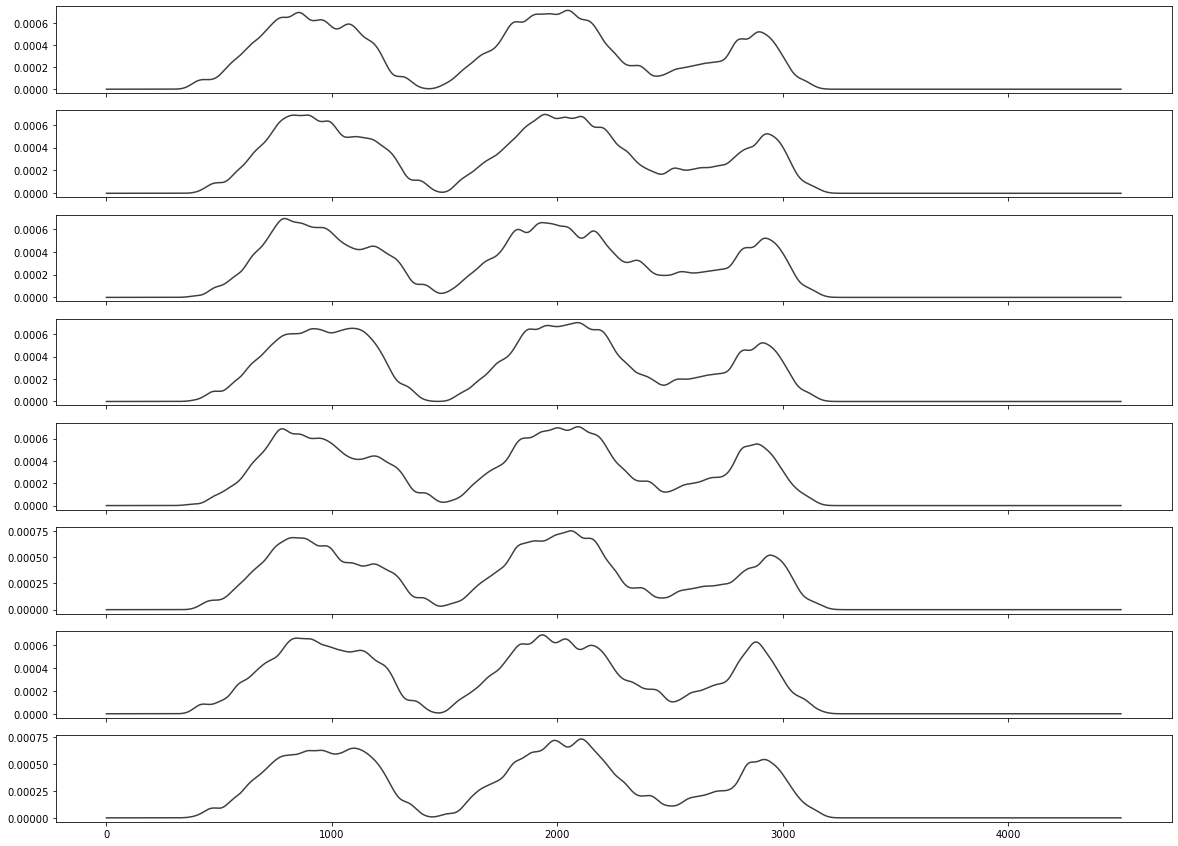

In [6]:
plt.rcParams['figure.figsize'] = [20, 15]
fig,axs = plt.subplots(len(KDEs),sharex=True)
for i in range(len(KDEs)):
    axs[i].plot(KDEs[i],color='black',alpha=0.75)

In [7]:
# Now we want to go through and create synthetic KDEs from each of the parent samples
# The model will be tested on variable number of soures vs variable number of grains drawn from the PDF
# For each parent I will need to generate 1000 KDEs with 10-300 grains drawn in intervals of 5
# These will be stored in a dictionary with key [parent, grains]

In [8]:
###########################################
# Presets
bw = 15
xdif = 1
hit_vals = np.round(np.logspace(1,3,num=35),0)
#hit_vals = [10,50,100,150,300,500,1000]
###########################################
# start a timer
start = time.time()
final_synth_dict = {}
# t will be the number of sources
for t in range(1,2):
    # Grab the KDE we will be working with
    index_KDE = [df.loc[t]['KDE']]
    # Create a list of ages from the given probability
    index_age = []
    for r in range(0,500):
        pick = np.random.choice(np.arange(0,4501),p = np.sum(index_KDE, axis = 0)/np.sum(index_KDE))
        index_age.append(pick)
    init_KDE_age, init_KDE = dFunc.KDEcalcAges_2(index_age,x1=0,x2=4500,xdif=xdif,bw=bw,cumulative = False)
    # w will be the number of grains utilized
    for w in hit_vals:
        total_KDE_list = []
        w = int(w)
        for i in range(0,1000):
            source_dist = [np.random.choice(init_KDE_age, size = w, p = np.sum(index_KDE, axis = 0)/np.sum(index_KDE))]
            source_KDE_age, source_KDE = dFunc.KDEcalcAges_2(source_dist, x1=0, x2=4500, xdif=xdif, bw=bw, cumulative=False)
            source_KDE = source_KDE[0]
            total_KDE_list.append(source_KDE)
        final_synth_dict[t,w] = total_KDE_list
        end = time.time()
        total_time = end-start
        print('Finished with sample',t,'analyses',w)
        print('Total Run Time:',total_time)

Finished with sample 1 analyses 10
Total Run Time: 2.3435187339782715
Finished with sample 1 analyses 11
Total Run Time: 4.65303897857666
Finished with sample 1 analyses 13
Total Run Time: 7.371651649475098
Finished with sample 1 analyses 15
Total Run Time: 10.53887152671814
Finished with sample 1 analyses 17
Total Run Time: 13.938637971878052
Finished with sample 1 analyses 20
Total Run Time: 17.878526210784912
Finished with sample 1 analyses 23
Total Run Time: 22.386070013046265
Finished with sample 1 analyses 26
Total Run Time: 27.6312518119812
Finished with sample 1 analyses 30
Total Run Time: 35.45001459121704
Finished with sample 1 analyses 34
Total Run Time: 44.02694797515869
Finished with sample 1 analyses 39
Total Run Time: 54.341275453567505
Finished with sample 1 analyses 44
Total Run Time: 65.84586811065674
Finished with sample 1 analyses 51
Total Run Time: 79.43798494338989
Finished with sample 1 analyses 58
Total Run Time: 95.58772158622742
Finished with sample 1 analyses

In [9]:
pickle.dump(final_synth_dict,open('0.95-0.99 - 1 Sources.p','wb'))

KeyError: (8, 100)

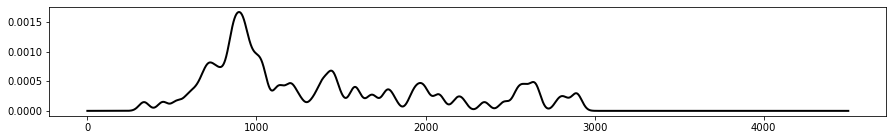

In [16]:
plt.rcParams['figure.figsize'] = [15, 2]
plt.plot(KDEs[8],color = 'black', lw = 2, label = 'Source')
plt.plot(final_synth_dict[8,100][0],color = 'gray', lw =1,label = 'Derivative')
plt.legend()
plt.savefig('Overplot for 0.65-0.75 Source 8.jpeg')

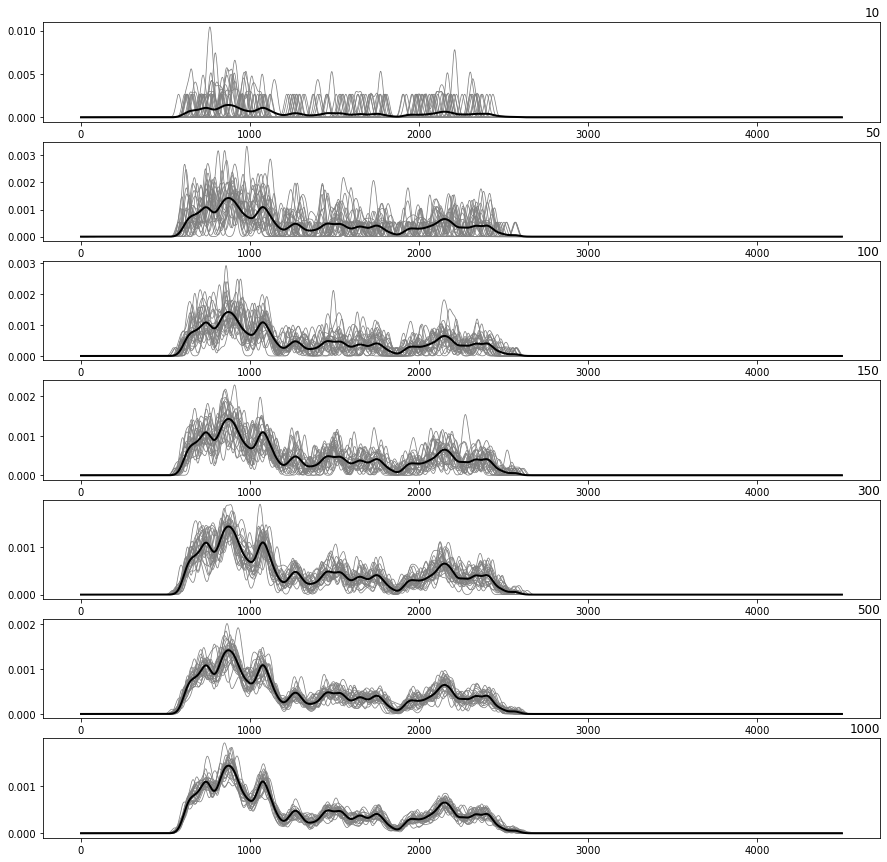

In [22]:
# Lets plot all of the synths over their original data
figs, axs = plt.subplots(len(final_synth_dict), figsize = (15,15))

for i, sample in enumerate(final_synth_dict):
    KDE_subset = final_synth_dict[sample]
    for j in range(len(final_synth_dict[sample])):
        axs[i].plot(KDE_subset[j], color = 'gray', lw = 0.75,label = 'Derivative')
        axs[i].set_title(sample[1],loc='right')
    axs[i].plot(df.loc[0]['KDE'], color = 'black', lw = 2,label = 'Source')
plt.savefig('Overplots for 0.65-0.75 Sample 0.jpeg')

In [9]:
pickle.dump(final_synth_dict,open('Synth Pop 9 - 0.65-0.75.p','wb'))